Nama : Raafi Nur Adzani   
NIM  : A11.2021.13536

# Mengimport Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Library 'numpy' digunakan untuk komputasi numerik
2. Library 'matplotlib' digunakan untuk visualisasi data
3. Library 'pandas' digunakan untuk memanipulasi dan analisis data

# Mengimport Dataset

In [2]:
data = pd.read_csv('purchase_data_exe.csv')

tampung data csv 'purchase_data_exe.csv' dalam variable 'data'

In [3]:
data

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN
...,...,...,...,...,...,...,...,...
24994,29/11/2018,33699,513,credit,55.89,45.1,7,NaN
24995,29/11/2018,38652,501,paypal,136.27,61.0,11,NaN
24996,29/11/2018,30222,504,paypal,427.45,52.8,45,NaN
24997,29/11/2018,30183,507,credit,981.81,58.2,76,NaN


In [4]:
data["product_category"]=data["product_category"].astype(float)
X = data.loc[:,['product_category', 'value [USD]']].values
y = data.loc[:,'payment_method'].values

Siapkan data yang akan digunakan dalam pemodelan. Variabel X diisi dengan 2 kolom data, yaitu kategori produk dan nilai dalam USD dari data yang ada. Variabel y diisi dengan kolom metode pembayaran dari data. Data yang disiapkan akan digunakan sebagai input dan output dalam membuat model machine learning.

In [5]:
print(X)

[[505.    49.53]
 [509.    50.61]
 [507.    85.99]
 ...
 [504.   427.45]
 [507.   981.81]
 [505.     6.1 ]]


# Encoding Label

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
print(y)

[0 1 0 ... 1 0 0]


Gunakan LabelEncoder dari library sklearn.preprocessing untuk mengubah nilai-nilai pada array y dari string ke numerik. Metode fit_transform() digunakan untuk menghitung nilai numerik untuk setiap nilai kategori yang berbeda pada array y dan menggantikan nilai kategori dengan nilai numerik yang sesuai.

# Membagi Dataset menjadi Training Set dan Test Set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
print(X_train)

[[510.   467.69]
 [506.   111.06]
 [501.   171.01]
 ...
 [501.   588.29]
 [512.   287.56]
 [505.   637.96]]


In [10]:
print(y_train)

[0 1 0 ... 0 0 0]


In [11]:
len(X_train)

18749

In [12]:
len(X_test)

6250

In [13]:
len(y)

24999

In [14]:
len(y_test)

6250

In [15]:
len(y_train)

18749

# Menggunakan Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Sklearn.preprocessing.StandardScaler digunakan untuk standarisasi fitur dengan menghapus mean dan scaling ke unit variance. Kode tersebut dijalankan pada X_train dan X_test sehingga kedua set data diubah sedemikian rupa sehingga semua fitur memiliki mean = 0 dan variansi = 1.

In [17]:
print(X_train)

[[ 0.48645556  1.25284982]
 [-0.44726222 -0.44668205]
 [-1.61440946 -0.16098837]
 ...
 [-1.61440946  1.82757305]
 [ 0.95331446  0.39443445]
 [-0.68069167  2.06427705]]


In [18]:
print(X_test)

[[-0.44726222 -0.77131012]
 [-0.21383278  0.97292244]
 [ 0.71988501 -0.48575941]
 ...
 [-1.38098001 -0.42533246]
 [-1.61440946 -0.29675839]
 [ 0.48645556 -0.4122749 ]]


# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Gunakan library Scikit-learn untuk membuat sebuah K-Nearest Neighbors (KNN) classifier dengan menggunakan 5 tetangga terdekat dan metrik jarak Minkowski dengan nilai p=2. Kemudian, classifier tersebut dilatih (trained) dengan data training X_train dan label y_train.

# Prediksi Tes Set

In [20]:
y_pred = classifier.predict(X_test)

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Lakukan prediksi pada data yang belum diketahui kelasnya dengan menggunakan model yang telah dihasilkan sebelumnya. Hasil prediksi akan disimpan pada variabel y_pred.

# Membuat Perhitungan Confusion Matriks

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2285 1380]
 [1672  913]]


Confusion Matriks befungsi untuk menghitung hasil prediksi y_pred dan nilai sebenarnya y_test pada data uji. Confusion matriks akan menunjukkan jumlah data yang benar diprediksi dan salah diprediksi untuk masing-masing kelas pada data uji.

C:\Users\asd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its le

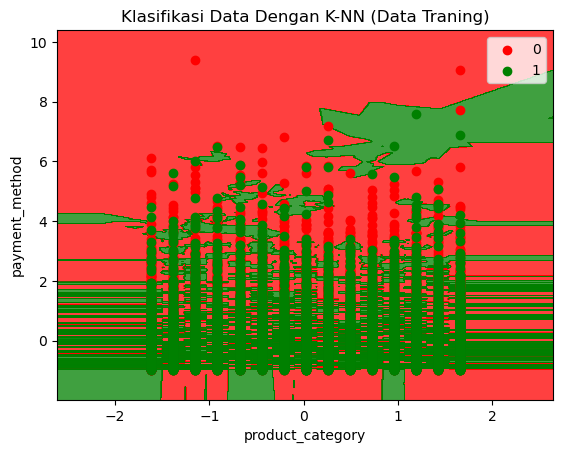

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01), 
                     np.arange(start=X_set[:, 1].min()-1,stop=X_set[:, 1].max()+1, step=0.01))

plt.contourf (x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Dengan K-NN (Data Traning)')
plt.xlabel('product_category')
plt.ylabel('payment_method')
plt.legend()
plt.show()

Visualisasikan data dengan membuat plot decision boundary dari model klasifikasi K-NN. Pertama, dilakukan pengaturan X_set dan y_set dengan nilai X_train dan y_train. Kemudian, dilakukan pembuatan meshgrid untuk menentukan area plot. Selanjutnya, dilakukan plotting pada area tersebut dengan memanfaatkan classifier.predict untuk menghasilkan warna dan membentuk decision boundary. Selanjutnya, data training ditampilkan dengan scatter plot dengan warna merah dan hijau untuk setiap kelasnya. Terakhir, ditampilkan judul, label, dan legenda pada plot tersebut.